An analysis of baseline results based on the mapped categories. I mapped the new categories to the original ones and analysed the predictions. I calculated the F1 scores only on labels that were not discarded from the joint schema.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,precision_score, recall_score

In [60]:
# Create a function to map the labels

map_FTD = {'A1 (argumentative)': 'discarded', 'A17 (review)': 'discarded', 'A14 (academic)': 'Information/Explanation', 'A16 (information)': 'Information/Explanation', 'A7 (instruction)': 'Instruction', 'A9 (legal)': 'Legal', 'A8 (news)': 'News', 'A11 (personal)': 'Opinion/Argumentation', 'A12 (promotion)': 'Promotion', 'A4 (fiction)': 'Prose/Lyrical'}

map_GINCO = {'FAQ': 'discarded', 'List of Summaries/Excerpts': 'discarded', 'Forum': 'Forum', 'Information/Explanation': 'Information/Explanation', 'Research Article': 'Information/Explanation', 'Instruction': 'Instruction', 'Recipe': 'Instruction', 'Legal/Regulation': 'Legal', 'Announcement': 'News', 'News/Reporting': 'News', 'Opinionated News': 'News', 'Opinion/Argumentation': 'Opinion/Argumentation', 'Review': 'Opinion/Argumentation', 'Call': 'Other', 'Correspondence': 'Other', 'Interview': 'Other', 'Other': 'Other', 'Script/Drama': 'Other', 'Invitation': 'Promotion', 'Promotion': 'Promotion', 'Promotion of a Product': 'Promotion', 'Promotion of Services': 'Promotion', 'Lyrical': 'Prose/Lyrical', 'Prose': 'Prose/Lyrical'}


map_CORE = {'Advice': 'discarded', 'Course Materials': 'discarded', 'Description of a Person': 'discarded', 'Description of a Thing': 'discarded', 'Description with Intent to Sell': 'discarded', 'FAQ about How-to': 'discarded', 'FAQ about Information': 'discarded', 'Historical Article': 'discarded', 'Information Blog': 'discarded', 'Magazine Article': 'discarded', 'Other Forum': 'discarded', 'Other Information': 'discarded', 'Other Informational Persuasion': 'discarded', 'Other Opinion': 'discarded', 'Other Spoken': 'discarded', 'Poem': 'discarded', 'Question/Answer Forum': 'discarded', 'Reader/Viewer Responses': 'discarded', 'Religious Blogs/Sermons': 'discarded', 'Technical Report': 'discarded', 'Transcript of Video/Audio': 'discarded', 'Travel Blog': 'discarded', 'Discussion Forum': 'Forum', 'Encyclopedia Article': 'Information/Explanation', 'Research Article': 'Information/Explanation', 'How-to': 'Instruction', 'Recipe': 'Instruction', 'Technical Support': 'Instruction', 'Legal terms': 'Legal', 'News Report/Blog': 'News', 'Sports Report': 'News', 'Editorial': 'Opinion/Argumentation', 'Formal Speech': 'Opinion/Argumentation', 'Letter to Editor': 'Opinion/Argumentation', 'Opinion Blog': 'Opinion/Argumentation', 'Personal Blog': 'Opinion/Argumentation', 'Persuasive Article or Essay': 'Opinion/Argumentation', 'Reviews': 'Opinion/Argumentation', 'Interview': 'Other', 'TV/Movie Script': 'Other', 'Advertisement': 'Promotion', 'Prayer': 'Prose/Lyrical', 'Short Story': 'Prose/Lyrical', 'Song Lyrics': 'Prose/Lyrical', 'Other Narrative': 'discarded', 'Other Lyrical': 'discarded', 'Other How-to': 'discarded'}

def map_xgenre(dataframe, column, new_column, mapping):
    """
    Maps the values in the selected dataframe column to the joint mapping and returns the dataframe with a new column with mappings.

    Args:
    - dataframe: the dataframe to which you want to apply mapping
    - column: the column with original categories you wish to map
    - new_column: name of the new column
    - mapping: map_GINCO, map_FTD or map_CORE
    """
    dataframe[new_column] = dataframe[column].map(mapping).fillna("check")

    print("Column mapped.")

    print("\n Dataframe size:")
    print(dataframe.shape)

    print("\n Value counts in the new series:")
    print(dataframe[new_column].value_counts())

    print("\n Print rows that need checking:")
    print(dataframe[dataframe[new_column] == "check"])

    return dataframe

# GINCO classifier

### GINCO-full set

In [3]:

ginco_pred = pd.read_csv("results/GINCO-full-set-classifier-predictions-on-test-sheet-with-predictions.csv", sep="\t", index_col = 0)

ginco_pred

,text,labels,y_pred_GINCO_full_set
574,"Italijanke, doslej še edine neporažene, so že ...",Opinionated News,News/Reporting
636,Novice <p/> Oglasi <p/> MX Proga <p/> Motocros...,Information/Explanation,Information/Explanation
297,Iskanje - forma <p/> Zakaj Demanda <p/> Verjam...,Promotion of Services,Promotion of Services
589,Vabilo lokalnim ponudnikom k sodelovanju pri p...,Invitation,Invitation
19,Prispevki <p/> Vedno več novogradenj in obnov ...,Promotion of a Product,Information/Explanation
...,...,...,...
151,odgovor <p/> K sicer pravilnemu opozorilu na k...,Forum,Forum
643,Povpraševanje po leseni gradnji je na splošno ...,Opinionated News,News/Reporting
436,"Medtem ko smo razmišljali, smo tudi že veliko ...",Promotion,Promotion of Services
592,Objektivnost v času daril <p/> Darila vsi radi...,Opinion/Argumentation,Opinion/Argumentation


In [4]:
# Map the labels
ginco_pred["labels_to-X-GENRE"] = ginco_pred["labels"].map(map_GINCO).fillna("check")

ginco_pred["labels_to-X-GENRE"].value_counts()

News                       45
Promotion                  41
Opinion/Argumentation      27
Information/Explanation    26
discarded                  21
Other                      12
Forum                      11
Instruction                 7
Legal                       3
Name: labels_to-X-GENRE, dtype: int64

In [5]:
# Discard texts with "discarded" labels
ginco_pred = ginco_pred[ginco_pred["labels_to-X-GENRE"] != "discarded"]

ginco_pred.describe()

,text,labels,y_pred_GINCO_full_set,labels_to-X-GENRE
count,172,172,172,172
unique,172,16,14,8
top,"Italijanke, doslej še edine neporažene, so že ...",Information/Explanation,News/Reporting,News
freq,1,26,26,45


In [6]:
# Map the predicted labels as well
ginco_pred["y_pred_to-X-GENRE"] = ginco_pred["y_pred_GINCO_full_set"].map(map_GINCO).fillna("check")

ginco_pred["y_pred_to-X-GENRE"].value_counts()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_13360\1976273367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ginco_pred["y_pred_to-X-GENRE"] = ginco_pred["y_pred_GINCO_full_set"].map(map_GINCO).fillna("check")


News                       49
Promotion                  48
Information/Explanation    26
Opinion/Argumentation      23
Forum                      10
Instruction                 7
discarded                   5
Legal                       3
Other                       1
Name: y_pred_to-X-GENRE, dtype: int64

In [7]:
# Discard texts with "discarded" labels
ginco_pred = ginco_pred[ginco_pred["y_pred_to-X-GENRE"] != "discarded"]

ginco_pred.describe()

,text,labels,y_pred_GINCO_full_set,labels_to-X-GENRE,y_pred_to-X-GENRE
count,167,167,167,167,167
unique,167,16,13,8,8
top,"Italijanke, doslej še edine neporažene, so že ...",Information/Explanation,News/Reporting,News,News
freq,1,26,26,45,49


Analysis of prediction results of the GINCO-full set classifier on 167 texts from the test split. 26 texts were not included, because they belong to the discarded categories.

In [8]:
LABELS = list(ginco_pred["labels_to-X-GENRE"].unique())
LABELS

['News',
 'Information/Explanation',
 'Promotion',
 'Other',
 'Opinion/Argumentation',
 'Forum',
 'Legal',
 'Instruction']

Macro f1: 0.715, Micro f1: 0.725


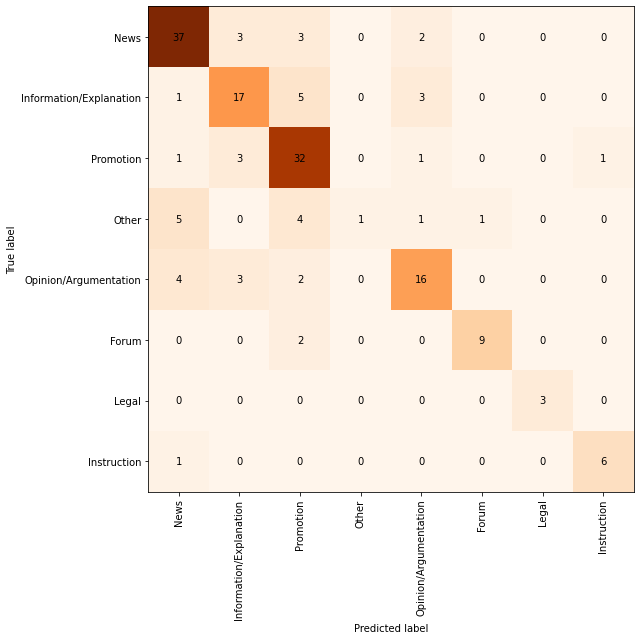

<Figure size 432x288 with 0 Axes>

In [9]:
y_true = list(ginco_pred["labels_to-X-GENRE"])
y_pred = list(ginco_pred["y_pred_to-X-GENRE"])

macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()

In [13]:
ginco_pred = ginco_pred.rename(columns = {"labels": "labels-GINCO-full", "labels_to-X-GENRE": "labels-GINCO-full-X-GENRE", "y_pred_to-X-GENRE":"y_pred_GINCO-full-X-GENRE"})

In [14]:
ginco_pred.head(3)

,text,labels-GINCO-full,y_pred_GINCO_full_set,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE
574,"Italijanke, doslej še edine neporažene, so že ...",Opinionated News,News/Reporting,News,News
636,Novice <p/> Oglasi <p/> MX Proga <p/> Motocros...,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation
297,Iskanje - forma <p/> Zakaj Demanda <p/> Verjam...,Promotion of Services,Promotion of Services,Promotion,Promotion


In [15]:
# Save the file
ginco_pred.to_csv("results/GINCO-predictions-from-all-classifiers.csv", sep="\t")

### GINCO-downcast set

In [16]:
# Import data
ginco_pred_dc = pd.read_csv("results/testing-GINCO-downcast-on-test-sheet-with-predictions.csv", sep="\t", index_col = 0)

ginco_pred_dc

,text,labels,y_pred_GINCO_downcast
677,Gibanje za dostojno delo in socialno družbo da...,List of Summaries/Excerpts,List of Summaries/Excerpts
355,Toronto Drug Bust v tujini <p/> Na letošnji pr...,Information/Explanation,News/Reporting
500,Član Judo kluba Drava Klemen Ferjan je ta kone...,News/Reporting,News/Reporting
545,prva stran > Vadba > Ostalo > Kaj je MaxxFIT P...,Promotion,Promotion
892,"Opis izdelka <p/> Sightmark Boresight, Najhitr...",Promotion,List of Summaries/Excerpts
...,...,...,...
963,Nahajate se tukaj <p/> White Stain <p/> Ljublj...,Promotion,Promotion
781,Arhiv novic <p/> Vlada izdala uredbo o manjših...,Information/Explanation,News/Reporting
757,TKD Sovica vabi na nov pohod s predavanjem! Te...,List of Summaries/Excerpts,Promotion
871,Znani nasprotniki v kvalifikacijah <p/> Idrija...,News/Reporting,News/Reporting


In [17]:
# Map the labels
ginco_pred_dc["labels_GINCO-downcast_X-GENRE"] = ginco_pred_dc["labels"].map(map_GINCO).fillna("check")

ginco_pred_dc["labels_GINCO-downcast_X-GENRE"].value_counts()

News                       44
Promotion                  42
Information/Explanation    28
Opinion/Argumentation      26
discarded                  21
Other                      16
Forum                      10
Instruction                 9
Legal                       4
Name: labels_GINCO-downcast_X-GENRE, dtype: int64

In [18]:
# Discard texts with "discarded" labels
ginco_pred_dc = ginco_pred_dc[ginco_pred_dc["labels_GINCO-downcast_X-GENRE"] != "discarded"]

ginco_pred_dc.describe()

,text,labels,y_pred_GINCO_downcast,labels_GINCO-downcast_X-GENRE
count,179,179,179,179
unique,179,8,9,8
top,Toronto Drug Bust v tujini <p/> Na letošnji pr...,News/Reporting,News/Reporting,News
freq,1,44,49,44


In [19]:
# Map the predicted labels as well
ginco_pred_dc["y_pred_GINCO-downcast-X-GENRE"] = ginco_pred_dc["y_pred_GINCO_downcast"].map(map_GINCO).fillna("check")

ginco_pred_dc["y_pred_GINCO-downcast-X-GENRE"].value_counts()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_13360\3985743388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ginco_pred_dc["y_pred_GINCO-downcast-X-GENRE"] = ginco_pred_dc["y_pred_GINCO_downcast"].map(map_GINCO).fillna("check")


News                       49
Promotion                  47
Opinion/Argumentation      25
Information/Explanation    21
Instruction                11
Forum                      10
Other                       8
discarded                   4
Legal                       4
Name: y_pred_GINCO-downcast-X-GENRE, dtype: int64

In [20]:
# Discard texts with "discarded" labels
ginco_pred_dc = ginco_pred_dc[ginco_pred_dc["y_pred_GINCO-downcast-X-GENRE"] != "discarded"]

ginco_pred_dc.describe()

,text,labels,y_pred_GINCO_downcast,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE
count,175,175,175,175,175
unique,175,8,8,8,8
top,Toronto Drug Bust v tujini <p/> Na letošnji pr...,News/Reporting,News/Reporting,News,News
freq,1,42,49,42,49


Analysis of prediction results of the GINCO-downcast classifier on 175 texts from the test split. 25 texts were not included, because they belong to the discarded categories.

In [21]:
LABELS = list(ginco_pred_dc["labels_GINCO-downcast_X-GENRE"].unique())
LABELS

['Information/Explanation',
 'News',
 'Promotion',
 'Opinion/Argumentation',
 'Forum',
 'Other',
 'Instruction',
 'Legal']

Macro f1: 0.757, Micro f1: 0.737


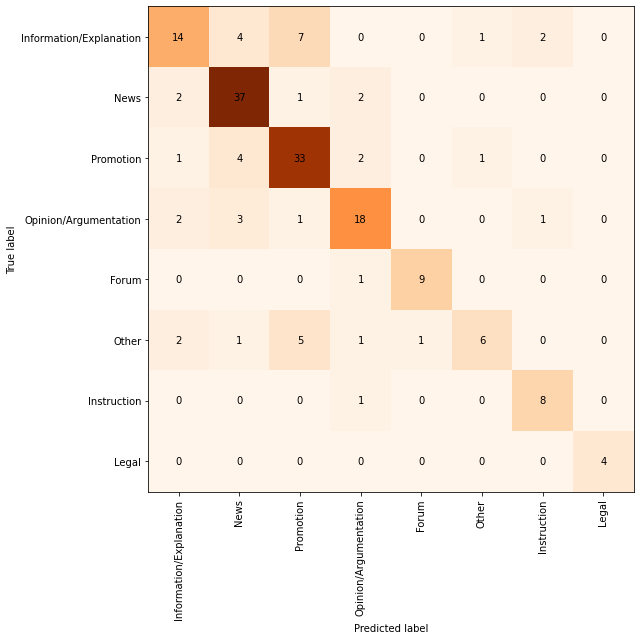

<Figure size 432x288 with 0 Axes>

In [22]:
y_true = list(ginco_pred_dc["labels_GINCO-downcast_X-GENRE"])
y_pred = list(ginco_pred_dc["y_pred_GINCO-downcast-X-GENRE"])

macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()

In [23]:
ginco_pred_dc.head(3)

,text,labels,y_pred_GINCO_downcast,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE
355,Toronto Drug Bust v tujini <p/> Na letošnji pr...,Information/Explanation,News/Reporting,Information/Explanation,News
500,Član Judo kluba Drava Klemen Ferjan je ta kone...,News/Reporting,News/Reporting,News,News
545,prva stran > Vadba > Ostalo > Kaj je MaxxFIT P...,Promotion,Promotion,Promotion,Promotion


In [24]:
ginco_pred_dc = ginco_pred_dc.rename(columns={"labels":"labels-GINCO-downcast"})

ginco_pred_dc.head(3)

,text,labels-GINCO-downcast,y_pred_GINCO_downcast,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE
355,Toronto Drug Bust v tujini <p/> Na letošnji pr...,Information/Explanation,News/Reporting,Information/Explanation,News
500,Član Judo kluba Drava Klemen Ferjan je ta kone...,News/Reporting,News/Reporting,News,News
545,prva stran > Vadba > Ostalo > Kaj je MaxxFIT P...,Promotion,Promotion,Promotion,Promotion


In [25]:
# Merge the predictions of the two classifiers to one sheet
ginco_merged =pd.concat([ginco_pred, ginco_pred_dc], axis="columns")
ginco_merged

,text,labels-GINCO-full,y_pred_GINCO_full_set,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE,text,labels-GINCO-downcast,y_pred_GINCO_downcast,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News/Reporting,Opinionated News,News,News,"Šport <p/> Zimska liga malega nogometa sobota,...",News/Reporting,News/Reporting,News,News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Promotion,News/Reporting,Promotion,News
4,Selena Gomez ponudila v poslušanje novi album ...,Opinionated News,News/Reporting,News,News,NaN,NaN,NaN,NaN,NaN
8,"Razstava,, beli šport ob zeleni reki,, <p/> Ra...",Invitation,Invitation,Promotion,Promotion,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
982,NaN,NaN,NaN,NaN,NaN,zaščitna očala <p/> zaščita sluha <p/> delovna...,Promotion,Promotion,Promotion,Promotion
987,info@dc-dlan.si <p/> 0590 80 616 <p/> CONTACT ...,Opinion/Argumentation,Information/Explanation,Opinion/Argumentation,Information/Explanation,NaN,NaN,NaN,NaN,NaN
990,Slovenski etnografski muzej <p/> Sodelovanje S...,News/Reporting,Information/Explanation,News,Information/Explanation,NaN,NaN,NaN,NaN,NaN
991,Najlažji in najboljši način čiščenja spomladan...,Promotion,Promotion of a Product,Promotion,Promotion,NaN,NaN,NaN,NaN,NaN


In [39]:
# Add the other predictions from the "sheets with all information"

ginco_sheet = pd.read_csv("data-sheets-with-all-info/GINCO-MT-GINCO-keeptext-with-all-information.csv", sep = "\t", index_col=0)

ginco_sheet

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,FTD_pred_on_SL,FTD_pred_on_MT,split-without-rare-categories,primary_level_4,downcast_split,CORE_main_pred_on_SL,CORE_main_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,A8 (news),A8 (news),test,News/Reporting,test,Narrative,Narrative,Sports Report,Sports Report,News
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,A16 (information),A16 (information),test,Information/Explanation,dev,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Information/Explanation
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,...,A12 (promotion),A12 (promotion),train,Promotion,test,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Promotion
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,A8 (news),A8 (news),train,News/Reporting,train,Informational Description/Explanation,Informational Description/Explanation,News Report/Blog,News Report/Blog,News
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,Opinionated News,Opinionated News,Opinionated News,NaN,NaN,NaN,...,A8 (news),A8 (news),test,News/Reporting,train,Narrative,Narrative,News Report/Blog,News Report/Blog,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,374730,http://khetanes.si/sl-si/produkti/projektne-no...,2021,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,A12 (promotion),A8 (news),test,Information/Explanation,test,Informational Description/Explanation,Informational Description/Explanation,Description of a Thing,Description of a Thing,Information/Explanation
998,476885,https://www.merkur.si/navigacija/nasveti/kopal...,2021,False,List of Summaries/Excerpts,List of Summaries/Excerpts,List of Summaries/Excerpts,NaN,NaN,NaN,...,A12 (promotion),A12 (promotion),train,List of Summaries/Excerpts,train,Informational Persuasion,Informational Persuasion,Description with Intent to Sell,Description with Intent to Sell,discarded
999,674213,http://www.sex2.si/category/ocene-izdelkov/,2021,False,List of Summaries/Excerpts,List of Summaries/Excerpts,List of Summaries/Excerpts,NaN,NaN,NaN,...,A12 (promotion),A12 (promotion),train,List of Summaries/Excerpts,train,Informational Persuasion,Informational Persuasion,Description with Intent to Sell,Description with Intent to Sell,discarded
1000,975590,http://www.ipsos.si/VodenjeVIZ_VI_past_dvojne_...,2021,False,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,NaN,NaN,NaN,...,A1 (argumentative),A1 (argumentative),dev,Opinion/Argumentation,train,Informational Description/Explanation,Informational Description/Explanation,FAQ about Information,Question/Answer Forum,Opinion/Argumentation


In [40]:
final_ginco_sheet = pd.concat([ginco_sheet, ginco_merged], axis="columns")
final_ginco_sheet

,id,url,crawled,hard,primary_level_1,primary_level_2,primary_level_3,secondary_level_1,secondary_level_2,secondary_level_3,...,text,labels-GINCO-full,y_pred_GINCO_full_set,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE,text,labels-GINCO-downcast,y_pred_GINCO_downcast,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE
0,3949,http://www.pomurje.si/aktualno/sport/zimska-li...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,"Šport <p/> Zimska liga malega nogometa sobota,...",News/Reporting,Opinionated News,News,News,"Šport <p/> Zimska liga malega nogometa sobota,...",News/Reporting,News/Reporting,News,News
1,3726,http://www.ss-sezana.si/sss/index.php?option=c...,2014,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN,NaN
2,5621,http://www.kamnik-starejsi.si/novice/144-sodel...,2014,False,Promotion of Services,Promotion of Services,Promotion,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,...,NaN,NaN,NaN,NaN,NaN,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,Promotion,News/Reporting,Promotion,News
3,3776,http://www.radiocelje.si/novica.php?id=13007&a...,2014,False,News/Reporting,News/Reporting,News/Reporting,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2102,http://www.mtv.si/novice/selena-gomez-ponudila...,2014,False,Opinionated News,Opinionated News,Opinionated News,NaN,NaN,NaN,...,Selena Gomez ponudila v poslušanje novi album ...,Opinionated News,News/Reporting,News,News,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,374730,http://khetanes.si/sl-si/produkti/projektne-no...,2021,False,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,...,Projektne novine <p/> Promocijski projektni ča...,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,Projektne novine <p/> Promocijski projektni ča...,Information/Explanation,Promotion,Information/Explanation,Promotion
998,476885,https://www.merkur.si/navigacija/nasveti/kopal...,2021,False,List of Summaries/Excerpts,List of Summaries/Excerpts,List of Summaries/Excerpts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,674213,http://www.sex2.si/category/ocene-izdelkov/,2021,False,List of Summaries/Excerpts,List of Summaries/Excerpts,List of Summaries/Excerpts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,975590,http://www.ipsos.si/VodenjeVIZ_VI_past_dvojne_...,2021,False,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
final_ginco_sheet.columns

Index(['id', 'url', 'crawled', 'hard', 'primary_level_1', 'primary_level_2',
       'primary_level_3', 'secondary_level_1', 'secondary_level_2',
       'secondary_level_3', 'tertiary_level_1', 'tertiary_level_2',
       'tertiary_level_3', 'split', 'domain', 'GINCORE', 'Slovene_text',
       'MT_text', 'text_length', 'FTD_pred_on_SL', 'FTD_pred_on_MT',
       'split-without-rare-categories', 'primary_level_4', 'downcast_split',
       'CORE_main_pred_on_SL', 'CORE_main_pred_on_MT', 'CORE_sub_pred_on_SL',
       'CORE_sub_pred_on_MT', 'primary_level_1_to_X-GENRE', 'text',
       'labels-GINCO-full', 'y_pred_GINCO_full_set',
       'labels-GINCO-full-X-GENRE', 'y_pred_GINCO-full-X-GENRE', 'text',
       'labels-GINCO-downcast', 'y_pred_GINCO_downcast',
       'labels_GINCO-downcast_X-GENRE', 'y_pred_GINCO-downcast-X-GENRE'],
      dtype='object')

In [62]:
# Keep only interesting columns
ginco_prediction_comparison = final_ginco_sheet.drop(columns = {'id', 'url', 'crawled', 'hard', 'primary_level_1', 'primary_level_2',       'primary_level_3', 'secondary_level_1', 'secondary_level_2',       'secondary_level_3', 'tertiary_level_1', 'tertiary_level_2',       'tertiary_level_3', 'split', 'domain', 'GINCORE',       'MT_text', 'text_length',       'split-without-rare-categories', 'primary_level_4', 'downcast_split',       'CORE_main_pred_on_SL', 'CORE_main_pred_on_MT',        'labels-GINCO-full', 'y_pred_GINCO_full_set', 'text',       'labels-GINCO-downcast', 'y_pred_GINCO_downcast'})

ginco_prediction_comparison.head(3)

,Slovene_text,FTD_pred_on_SL,FTD_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE
0,"Šport <p/> Zimska liga malega nogometa sobota,...",A8 (news),A8 (news),Sports Report,Sports Report,News,News,News,News,News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,A16 (information),A16 (information),Description of a Thing,Description of a Thing,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN
2,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,A12 (promotion),A12 (promotion),Description of a Thing,Description of a Thing,Promotion,NaN,NaN,Promotion,News


### MT-GINCO-downcast

In [63]:
# Import data
ginco_pred_mt = pd.read_csv("results/testing-MT-GINCO-downcast-on-test-sheet-with-predictions.csv", sep="\t", index_col = 0)

ginco_pred_mt

,text,labels,y_pred_MT-GINCO_downcast
0,Sport <p/> Winter Little League Football Satur...,News/Reporting,News/Reporting
2,Project INNOVAge and the Oreli Institute <p/> ...,Promotion,News/Reporting
14,DISTURBED <p/> The storm that irritated the tw...,Other,Other
18,Almodovar in town <p/> 16/05/2013 <p/> The las...,Promotion,Opinion/Argumentation
25,"Seu d'Urgell, 23 May (STA) - As in the first W...",News/Reporting,News/Reporting
...,...,...,...
978,Detached house for sale <p/> Primorje-Gorski K...,Promotion,Promotion
979,UNIGAS IDEA LO35 oil burner <p/> This burner i...,Promotion,Promotion
982,safety glasses <p/> hearing protection <p/> wo...,Promotion,Promotion
996,Swimming at the Atlantis Aquapark <p/> A good ...,List of Summaries/Excerpts,Promotion


In [64]:
# Map the labels
ginco_pred_mt["labels_MT-GINCO-downcast_to-X-GENRE"] = ginco_pred_mt["labels"].map(map_GINCO).fillna("check")

ginco_pred_mt["labels_MT-GINCO-downcast_to-X-GENRE"].value_counts()

News                       44
Promotion                  42
Information/Explanation    28
Opinion/Argumentation      26
discarded                  21
Other                      16
Forum                      10
Instruction                 9
Legal                       4
Name: labels_MT-GINCO-downcast_to-X-GENRE, dtype: int64

In [65]:
# Discard texts with "discarded" labels
ginco_pred_mt = ginco_pred_mt[ginco_pred_mt["labels_MT-GINCO-downcast_to-X-GENRE"] != "discarded"]

ginco_pred_mt.describe()

,text,labels,y_pred_MT-GINCO_downcast,labels_MT-GINCO-downcast_to-X-GENRE
count,179,179,179,179
unique,179,8,9,8
top,Sport <p/> Winter Little League Football Satur...,News/Reporting,News/Reporting,News
freq,1,44,46,44


In [66]:
# Map the predicted labels as well
ginco_pred_mt["y_pred_MT-GINCO-downcast_to-X-GENRE"] = ginco_pred_mt["y_pred_MT-GINCO_downcast"].map(map_GINCO).fillna("check")

ginco_pred_mt["y_pred_MT-GINCO-downcast_to-X-GENRE"].value_counts()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_13360\2782680550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ginco_pred_mt["y_pred_MT-GINCO-downcast_to-X-GENRE"] = ginco_pred_mt["y_pred_MT-GINCO_downcast"].map(map_GINCO).fillna("check")


News                       46
Promotion                  46
Information/Explanation    27
Opinion/Argumentation      21
Other                      11
Instruction                11
Forum                      10
Legal                       4
discarded                   3
Name: y_pred_MT-GINCO-downcast_to-X-GENRE, dtype: int64

In [67]:
# Discard texts with "discarded" labels
ginco_pred_mt = ginco_pred_mt[ginco_pred_mt["y_pred_MT-GINCO-downcast_to-X-GENRE"] != "discarded"]

ginco_pred_mt.describe()

,text,labels,y_pred_MT-GINCO_downcast,labels_MT-GINCO-downcast_to-X-GENRE,y_pred_MT-GINCO-downcast_to-X-GENRE
count,176,176,176,176,176
unique,176,8,8,8,8
top,Sport <p/> Winter Little League Football Satur...,News/Reporting,News/Reporting,News,News
freq,1,42,46,42,46


Analysis of prediction results of the MT-GINCO-downcast classifier on 176 texts from the test split. 24 texts were not included, because they belong to the discarded categories.

In [68]:
LABELS = list(ginco_pred_mt["labels_MT-GINCO-downcast_to-X-GENRE"].unique())
LABELS

['News',
 'Promotion',
 'Other',
 'Opinion/Argumentation',
 'Instruction',
 'Information/Explanation',
 'Legal',
 'Forum']

Macro f1: 0.737, Micro f1: 0.727


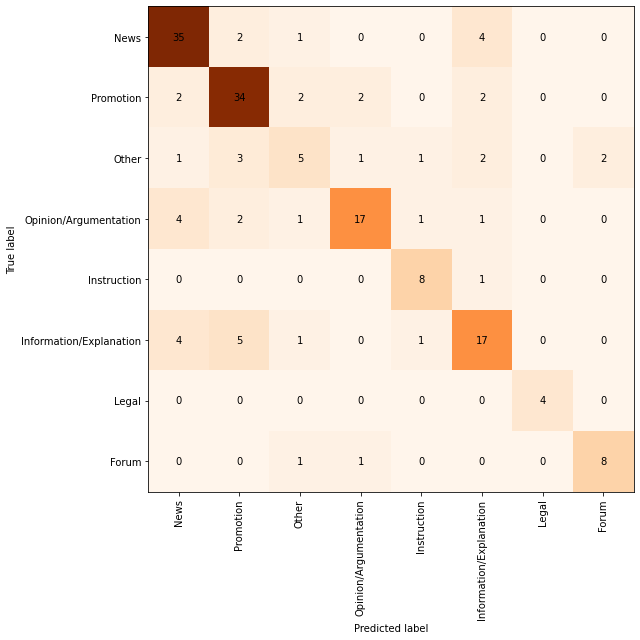

<Figure size 432x288 with 0 Axes>

In [69]:
y_true = list(ginco_pred_mt["labels_MT-GINCO-downcast_to-X-GENRE"])
y_pred = list(ginco_pred_mt["y_pred_MT-GINCO-downcast_to-X-GENRE"])

macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()

In [70]:
# Add this predictions to the sheet with predictions

ginco_predictions = pd.concat([ginco_prediction_comparison, ginco_pred_mt], axis="columns")

ginco_predictions.head(3)

,Slovene_text,FTD_pred_on_SL,FTD_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE,text,labels,y_pred_MT-GINCO_downcast,labels_MT-GINCO-downcast_to-X-GENRE,y_pred_MT-GINCO-downcast_to-X-GENRE
0,"Šport <p/> Zimska liga malega nogometa sobota,...",A8 (news),A8 (news),Sports Report,Sports Report,News,News,News,News,News,Sport <p/> Winter Little League Football Satur...,News/Reporting,News/Reporting,News,News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,A16 (information),A16 (information),Description of a Thing,Description of a Thing,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Projekt INNOVAge in zavod Oreli <p/> Zavod Ore...,A12 (promotion),A12 (promotion),Description of a Thing,Description of a Thing,Promotion,NaN,NaN,Promotion,News,Project INNOVAge and the Oreli Institute <p/> ...,Promotion,News/Reporting,Promotion,News


In [71]:
ginco_predictions.columns

Index(['Slovene_text', 'FTD_pred_on_SL', 'FTD_pred_on_MT',
       'CORE_sub_pred_on_SL', 'CORE_sub_pred_on_MT',
       'primary_level_1_to_X-GENRE', 'labels-GINCO-full-X-GENRE',
       'y_pred_GINCO-full-X-GENRE', 'labels_GINCO-downcast_X-GENRE',
       'y_pred_GINCO-downcast-X-GENRE', 'text', 'labels',
       'y_pred_MT-GINCO_downcast', 'labels_MT-GINCO-downcast_to-X-GENRE',
       'y_pred_MT-GINCO-downcast_to-X-GENRE'],
      dtype='object')

In [72]:
ginco_predictions = ginco_predictions.drop(columns = ['text', 'labels', 'y_pred_MT-GINCO_downcast'])
ginco_predictions.head(2)

,Slovene_text,FTD_pred_on_SL,FTD_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE,labels_MT-GINCO-downcast_to-X-GENRE,y_pred_MT-GINCO-downcast_to-X-GENRE
0,"Šport <p/> Zimska liga malega nogometa sobota,...",A8 (news),A8 (news),Sports Report,Sports Report,News,News,News,News,News,News,News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,A16 (information),A16 (information),Description of a Thing,Description of a Thing,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN


In [73]:
# Map FTD and CORE_sub labels to the ginco_predictions
ginco_predictions = map_xgenre(ginco_predictions, 'FTD_pred_on_SL', 'FTD_pred_on_SL-X-GENRE', map_FTD)
ginco_predictions = map_xgenre(ginco_predictions, 'FTD_pred_on_MT', 'FTD_pred_on_MT-X-GENRE', map_FTD)

Column mapped.

 Dataframe size:
(1002, 13)

 Value counts in the new series:
Promotion                  347
discarded                  220
Information/Explanation    158
News                       145
Instruction                 58
Opinion/Argumentation       38
Legal                       26
Prose/Lyrical               10
Name: FTD_pred_on_SL-X-GENRE, dtype: int64

 Print rows that need checking:
Empty DataFrame
Columns: [Slovene_text, FTD_pred_on_SL, FTD_pred_on_MT, CORE_sub_pred_on_SL, CORE_sub_pred_on_MT, primary_level_1_to_X-GENRE, labels-GINCO-full-X-GENRE, y_pred_GINCO-full-X-GENRE, labels_GINCO-downcast_X-GENRE, y_pred_GINCO-downcast-X-GENRE, labels_MT-GINCO-downcast_to-X-GENRE, y_pred_MT-GINCO-downcast_to-X-GENRE, FTD_pred_on_SL-X-GENRE]
Index: []
Column mapped.

 Dataframe size:
(1002, 14)

 Value counts in the new series:
Promotion                  287
News                       222
discarded                  198
Information/Explanation    120
Instruction                 70

In [74]:
ginco_predictions = map_xgenre(ginco_predictions, 'CORE_sub_pred_on_SL', 'CORE_sub_pred_on_SL-X-GENRE', map_CORE)
ginco_predictions = map_xgenre(ginco_predictions, 'CORE_sub_pred_on_MT', 'CORE_sub_pred_on_MT-X-GENRE', map_CORE)

Column mapped.

 Dataframe size:
(1002, 15)

 Value counts in the new series:
discarded                  513
News                       179
Forum                       71
Other                       68
Opinion/Argumentation       55
Information/Explanation     38
Legal                       38
Instruction                 26
Prose/Lyrical               14
Name: CORE_sub_pred_on_SL-X-GENRE, dtype: int64

 Print rows that need checking:
Empty DataFrame
Columns: [Slovene_text, FTD_pred_on_SL, FTD_pred_on_MT, CORE_sub_pred_on_SL, CORE_sub_pred_on_MT, primary_level_1_to_X-GENRE, labels-GINCO-full-X-GENRE, y_pred_GINCO-full-X-GENRE, labels_GINCO-downcast_X-GENRE, y_pred_GINCO-downcast-X-GENRE, labels_MT-GINCO-downcast_to-X-GENRE, y_pred_MT-GINCO-downcast_to-X-GENRE, FTD_pred_on_SL-X-GENRE, FTD_pred_on_MT-X-GENRE, CORE_sub_pred_on_SL-X-GENRE]
Index: []
Column mapped.

 Dataframe size:
(1002, 16)

 Value counts in the new series:
discarded                  502
News                       209
Opi

In [76]:
ginco_predictions.head(2)

,Slovene_text,FTD_pred_on_SL,FTD_pred_on_MT,CORE_sub_pred_on_SL,CORE_sub_pred_on_MT,primary_level_1_to_X-GENRE,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE,labels_MT-GINCO-downcast_to-X-GENRE,y_pred_MT-GINCO-downcast_to-X-GENRE,FTD_pred_on_SL-X-GENRE,FTD_pred_on_MT-X-GENRE,CORE_sub_pred_on_SL-X-GENRE,CORE_sub_pred_on_MT-X-GENRE
0,"Šport <p/> Zimska liga malega nogometa sobota,...",A8 (news),A8 (news),Sports Report,Sports Report,News,News,News,News,News,News,News,News,News,News,News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,A16 (information),A16 (information),Description of a Thing,Description of a Thing,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN,Information/Explanation,Information/Explanation,discarded,discarded


In [78]:
ginco_predictions.columns

Index(['Slovene_text', 'FTD_pred_on_SL', 'FTD_pred_on_MT',
       'CORE_sub_pred_on_SL', 'CORE_sub_pred_on_MT',
       'primary_level_1_to_X-GENRE', 'labels-GINCO-full-X-GENRE',
       'y_pred_GINCO-full-X-GENRE', 'labels_GINCO-downcast_X-GENRE',
       'y_pred_GINCO-downcast-X-GENRE', 'labels_MT-GINCO-downcast_to-X-GENRE',
       'y_pred_MT-GINCO-downcast_to-X-GENRE', 'FTD_pred_on_SL-X-GENRE',
       'FTD_pred_on_MT-X-GENRE', 'CORE_sub_pred_on_SL-X-GENRE',
       'CORE_sub_pred_on_MT-X-GENRE'],
      dtype='object')

In [79]:
ginco_predictions = ginco_predictions.drop(columns=['FTD_pred_on_SL', 'FTD_pred_on_MT','CORE_sub_pred_on_SL', 'CORE_sub_pred_on_MT'])

ginco_predictions.head(2)

,Slovene_text,primary_level_1_to_X-GENRE,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE,labels_MT-GINCO-downcast_to-X-GENRE,y_pred_MT-GINCO-downcast_to-X-GENRE,FTD_pred_on_SL-X-GENRE,FTD_pred_on_MT-X-GENRE,CORE_sub_pred_on_SL-X-GENRE,CORE_sub_pred_on_MT-X-GENRE
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News,News,News,News,News,News,News,News,News,News,News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN,Information/Explanation,Information/Explanation,discarded,discarded


In [80]:
# Save the file
ginco_predictions.to_csv("results/GINCO-all-baseline-predictions-in-xgenre.csv", sep="\t")

In [88]:
# First, let's compare the predictions of the GINCO-full classifier with the other two classifiers
# Let's use only the texts from the GINCO-full test split for calculating all F1 scores

# Drop all instances that do not have a prediction by GINCO-full
ginco_predictions_full = ginco_predictions.dropna(subset=["y_pred_GINCO-full-X-GENRE"])
ginco_predictions_full

,Slovene_text,primary_level_1_to_X-GENRE,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE,labels_MT-GINCO-downcast_to-X-GENRE,y_pred_MT-GINCO-downcast_to-X-GENRE,FTD_pred_on_SL-X-GENRE,FTD_pred_on_MT-X-GENRE,CORE_sub_pred_on_SL-X-GENRE,CORE_sub_pred_on_MT-X-GENRE
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News,News,News,News,News,News,News,News,News,News,News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN,Information/Explanation,Information/Explanation,discarded,discarded
4,Selena Gomez ponudila v poslušanje novi album ...,News,News,News,NaN,NaN,NaN,NaN,News,News,News,News
8,"Razstava,, beli šport ob zeleni reki,, <p/> Ra...",Promotion,Promotion,Promotion,NaN,NaN,NaN,NaN,Promotion,Promotion,discarded,discarded
16,Pri Tyri Banks se nikoli ne morem čisto odloči...,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,NaN,NaN,NaN,NaN,discarded,discarded,Opinion/Argumentation,Opinion/Argumentation
...,...,...,...,...,...,...,...,...,...,...,...,...
969,O trgovinski vojni med ZDA in Kitajsko se zadn...,News,News,Opinion/Argumentation,NaN,NaN,NaN,NaN,discarded,discarded,News,News
987,info@dc-dlan.si <p/> 0590 80 616 <p/> CONTACT ...,Opinion/Argumentation,Opinion/Argumentation,Information/Explanation,NaN,NaN,NaN,NaN,Information/Explanation,discarded,discarded,discarded
990,Slovenski etnografski muzej <p/> Sodelovanje S...,News,News,Information/Explanation,NaN,NaN,NaN,NaN,Promotion,News,discarded,discarded
991,Najlažji in najboljši način čiščenja spomladan...,Promotion,Promotion,Promotion,NaN,NaN,NaN,NaN,Instruction,Instruction,Instruction,Instruction


In [84]:
print(ginco_predictions_full.columns)

Index(['Slovene_text', 'primary_level_1_to_X-GENRE',
       'labels-GINCO-full-X-GENRE', 'y_pred_GINCO-full-X-GENRE',
       'labels_GINCO-downcast_X-GENRE', 'y_pred_GINCO-downcast-X-GENRE',
       'labels_MT-GINCO-downcast_to-X-GENRE',
       'y_pred_MT-GINCO-downcast_to-X-GENRE', 'FTD_pred_on_SL-X-GENRE',
       'FTD_pred_on_MT-X-GENRE', 'CORE_sub_pred_on_SL-X-GENRE',
       'CORE_sub_pred_on_MT-X-GENRE'],
      dtype='object')


In [89]:
# Drop all rows that have 'discarded' labels in the y_true labels
ginco_predictions_full = ginco_predictions_full[ginco_predictions_full['primary_level_1_to_X-GENRE'] != "discarded"]

ginco_predictions_full.shape

(167, 12)

In [90]:
ginco_predictions_full["primary_level_1_to_X-GENRE"].value_counts()

News                       45
Promotion                  38
Information/Explanation    26
Opinion/Argumentation      25
Other                      12
Forum                      11
Instruction                 7
Legal                       3
Name: primary_level_1_to_X-GENRE, dtype: int64

In [96]:
# X-GENRE labels ("discarded" is only added to be able to calculate metrics)
LABELS = ['News', 'Information/Explanation', 'Promotion', 'Opinion/Argumentation', 'Forum', 'Instruction', 'Legal', 'Other', 'Prose/Lyrical','discarded']

In [92]:
ginco_predictions_full

,Slovene_text,primary_level_1_to_X-GENRE,labels-GINCO-full-X-GENRE,y_pred_GINCO-full-X-GENRE,labels_GINCO-downcast_X-GENRE,y_pred_GINCO-downcast-X-GENRE,labels_MT-GINCO-downcast_to-X-GENRE,y_pred_MT-GINCO-downcast_to-X-GENRE,FTD_pred_on_SL-X-GENRE,FTD_pred_on_MT-X-GENRE,CORE_sub_pred_on_SL-X-GENRE,CORE_sub_pred_on_MT-X-GENRE
0,"Šport <p/> Zimska liga malega nogometa sobota,...",News,News,News,News,News,News,News,News,News,News,News
1,JEDILNIK <p/> Iskalnik <p/> Poglavitni cilj pr...,Information/Explanation,Information/Explanation,Information/Explanation,NaN,NaN,NaN,NaN,Information/Explanation,Information/Explanation,discarded,discarded
4,Selena Gomez ponudila v poslušanje novi album ...,News,News,News,NaN,NaN,NaN,NaN,News,News,News,News
8,"Razstava,, beli šport ob zeleni reki,, <p/> Ra...",Promotion,Promotion,Promotion,NaN,NaN,NaN,NaN,Promotion,Promotion,discarded,discarded
16,Pri Tyri Banks se nikoli ne morem čisto odloči...,Opinion/Argumentation,Opinion/Argumentation,Opinion/Argumentation,NaN,NaN,NaN,NaN,discarded,discarded,Opinion/Argumentation,Opinion/Argumentation
...,...,...,...,...,...,...,...,...,...,...,...,...
969,O trgovinski vojni med ZDA in Kitajsko se zadn...,News,News,Opinion/Argumentation,NaN,NaN,NaN,NaN,discarded,discarded,News,News
987,info@dc-dlan.si <p/> 0590 80 616 <p/> CONTACT ...,Opinion/Argumentation,Opinion/Argumentation,Information/Explanation,NaN,NaN,NaN,NaN,Information/Explanation,discarded,discarded,discarded
990,Slovenski etnografski muzej <p/> Sodelovanje S...,News,News,Information/Explanation,NaN,NaN,NaN,NaN,Promotion,News,discarded,discarded
991,Najlažji in najboljši način čiščenja spomladan...,Promotion,Promotion,Promotion,NaN,NaN,NaN,NaN,Instruction,Instruction,Instruction,Instruction


In [97]:
ginco_predictions_full.columns

Index(['Slovene_text', 'primary_level_1_to_X-GENRE',
       'labels-GINCO-full-X-GENRE', 'y_pred_GINCO-full-X-GENRE',
       'labels_GINCO-downcast_X-GENRE', 'y_pred_GINCO-downcast-X-GENRE',
       'labels_MT-GINCO-downcast_to-X-GENRE',
       'y_pred_MT-GINCO-downcast_to-X-GENRE', 'FTD_pred_on_SL-X-GENRE',
       'FTD_pred_on_MT-X-GENRE', 'CORE_sub_pred_on_SL-X-GENRE',
       'CORE_sub_pred_on_MT-X-GENRE'],
      dtype='object')

In [100]:
# Predictions of the FTD on GINCO-full test split

# Create a function to calculate F1 scores and produce a confusion matrix

def evaluate(dataframe, y_true_column, y_pred_column):
    y_true = list(dataframe[y_true_column])
    y_pred = list(dataframe[y_pred_column])

    LABELS = list(dataframe[y_true_column].unique())

    macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
    micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
    print(f"Micro, macro f1: {micro:0.3}, {macro:0.3}")

    # Plot the confusion matrix:
    cm = confusion_matrix(y_true, y_pred, labels=LABELS)
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, cmap="Oranges")
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
    classNames = LABELS
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=90)
    plt.yticks(tick_marks, classNames)

    plt.tight_layout()
    fig1 = plt.gcf()
    plt.show()
    plt.draw()

```
Index(['Slovene_text', 'primary_level_1_to_X-GENRE',
       'labels-GINCO-full-X-GENRE', 'y_pred_GINCO-full-X-GENRE',
       'labels_GINCO-downcast_X-GENRE', 'y_pred_GINCO-downcast-X-GENRE',
       'labels_MT-GINCO-downcast_to-X-GENRE',
       'y_pred_MT-GINCO-downcast_to-X-GENRE', 'FTD_pred_on_SL-X-GENRE',
       'FTD_pred_on_MT-X-GENRE', 'CORE_sub_pred_on_SL-X-GENRE',
       'CORE_sub_pred_on_MT-X-GENRE'],
      dtype='object')
```

Micro, macro f1: 0.725, 0.715


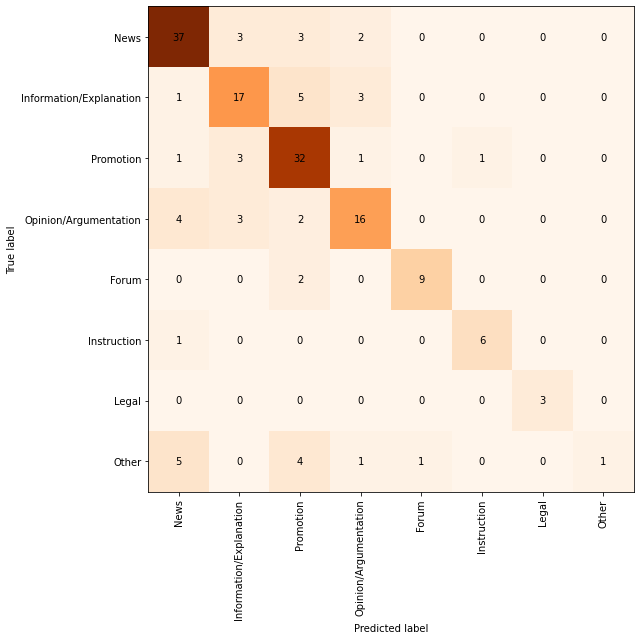

<Figure size 432x288 with 0 Axes>

In [101]:
# Evaluate classifiers on the GINCO-full test split

# GINCO-full classifier
evaluate(ginco_predictions_full, 'primary_level_1_to_X-GENRE', 'y_pred_GINCO-full-X-GENRE')

Micro, macro f1: 0.525, 0.429


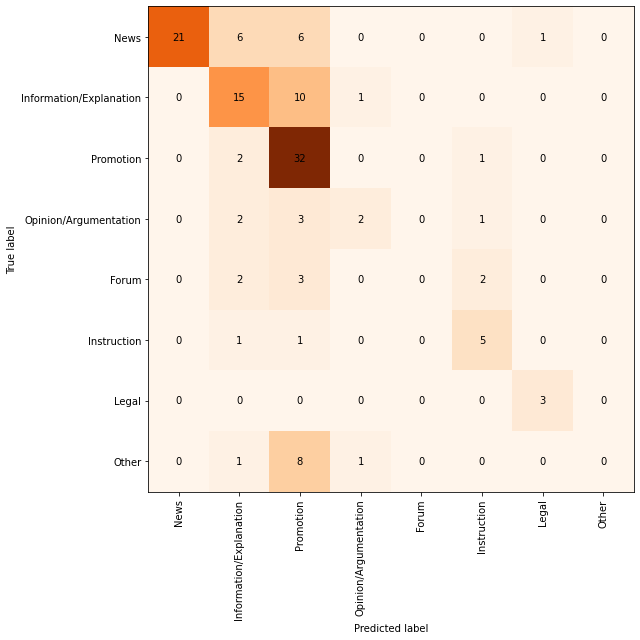

<Figure size 432x288 with 0 Axes>

In [103]:
# Evaluate classifiers on the GINCO-full test split

# FTD classifier, applied to Slovene text
evaluate(ginco_predictions_full, 'primary_level_1_to_X-GENRE', 'FTD_pred_on_SL-X-GENRE')

Micro, macro f1: 0.561, 0.432


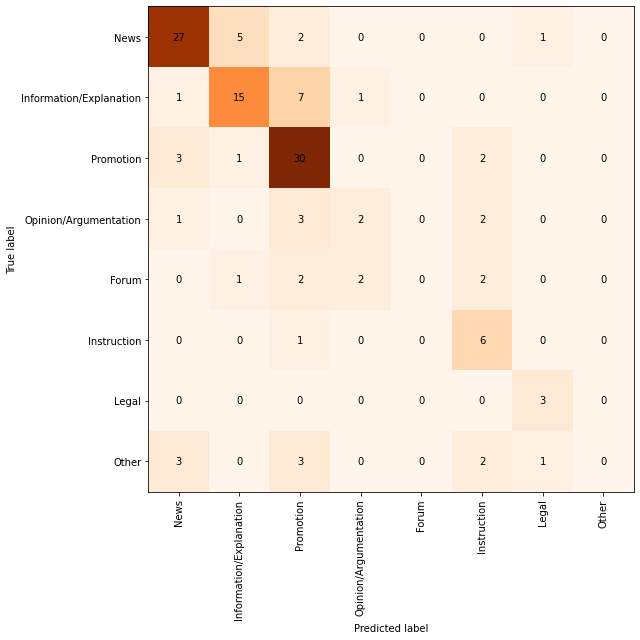

<Figure size 432x288 with 0 Axes>

In [104]:
# Evaluate classifiers on the GINCO-full test split

# FTD classifier applied to English (MT) text
evaluate(ginco_predictions_full, 'primary_level_1_to_X-GENRE', 'FTD_pred_on_MT-X-GENRE')

Micro, macro f1: 0.385, 0.38


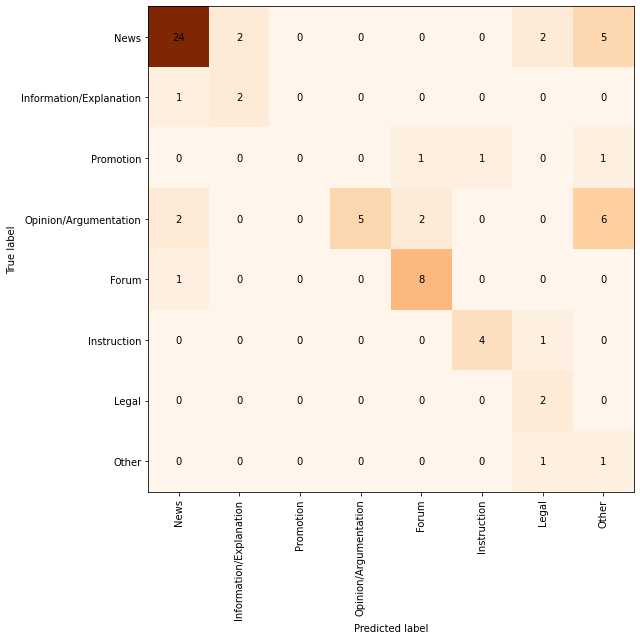

<Figure size 432x288 with 0 Axes>

In [105]:
# Evaluate classifiers on the GINCO-full test split

# CORE classifier applied to English (MT) text
evaluate(ginco_predictions_full, 'primary_level_1_to_X-GENRE', 'CORE_sub_pred_on_SL-X-GENRE')

# FTD classifier

In [27]:
# Import data
ftd_pred = pd.read_csv("results/FTD-classifier-predictions-on-test-sheet-with-predictions.csv", sep="\t", index_col = 0)

ftd_pred

,text,labels,y_pred,y_true_mapped,y_pred_mapped
926,"Frank , 22 , is unemployed and still living at...",6,6,A4 (fiction),A4 (fiction)
673,The following is the list of ISP supplied by M...,2,7,A12 (promotion),A7 (instruction)
451,Search results for Results 12081 to 12090 of 1...,8,8,A8 (news),A8 (news)
1568,Last-minute solution . Even if it 's something...,7,7,A7 (instruction),A7 (instruction)
1088,1 Application-level Fault-Tolerance Protocols ...,3,3,A14 (academic),A14 (academic)
...,...,...,...,...,...
622,It still sounds quite broad though ? ' A lot o...,1,1,A11 (personal),A11 (personal)
1262,Article III of the United States Constitution ...,9,4,A9 (legal),A16 (information)
1429,A How-To Guide for Purchasing Salvage Vehicles...,7,7,A7 (instruction),A7 (instruction)
436,Most liaison psychiatry posts are now managed ...,9,7,A9 (legal),A7 (instruction)


In [28]:
# Map the labels
ftd_pred["labels_to-X-GENRE"] = ftd_pred["y_true_mapped"].map(map_FTD).fillna("check")

ftd_pred["labels_to-X-GENRE"].value_counts()

discarded                  73
Promotion                  51
Information/Explanation    49
Instruction                33
News                       27
Prose/Lyrical              19
Opinion/Argumentation      16
Legal                      15
Name: labels_to-X-GENRE, dtype: int64

In [29]:
# Discard texts with "discarded" labels
ftd_pred = ftd_pred[ftd_pred["labels_to-X-GENRE"] != "discarded"]

ftd_pred.describe()

,labels,y_pred
count,210.000000,210.000000
mean,4.733333,4.638095
std,2.616717,2.749941
min,1.000000,0.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,7.000000,7.000000
max,9.000000,9.000000


In [30]:
# Map the predicted labels as well
ftd_pred["y_pred_to-X-GENRE"] = ftd_pred["y_pred_mapped"].map(map_FTD).fillna("check")

ftd_pred["y_pred_to-X-GENRE"].value_counts()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_13596\2978306926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftd_pred["y_pred_to-X-GENRE"] = ftd_pred["y_pred_mapped"].map(map_FTD).fillna("check")


Promotion                  47
Information/Explanation    40
Instruction                33
News                       30
Prose/Lyrical              18
Opinion/Argumentation      16
discarded                  13
Legal                      13
Name: y_pred_to-X-GENRE, dtype: int64

In [31]:
# Discard texts with "discarded" labels
ftd_pred = ftd_pred[ftd_pred["y_pred_to-X-GENRE"] != "discarded"]

ftd_pred.describe()

,labels,y_pred
count,197.000000,197.000000
mean,4.705584,4.842640
std,2.599965,2.651647
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,7.000000,7.000000
max,9.000000,9.000000


In [32]:
283-197

86

Analysis of prediction results of the FTD classifier on 197 texts from the test split. 86 texts were not included, because they belong to the discarded categories.

In [33]:
LABELS = list(ftd_pred["labels_to-X-GENRE"].unique())
LABELS

['Prose/Lyrical',
 'Promotion',
 'News',
 'Instruction',
 'Information/Explanation',
 'Opinion/Argumentation',
 'Legal']

Macro f1: 0.859, Micro f1: 0.853


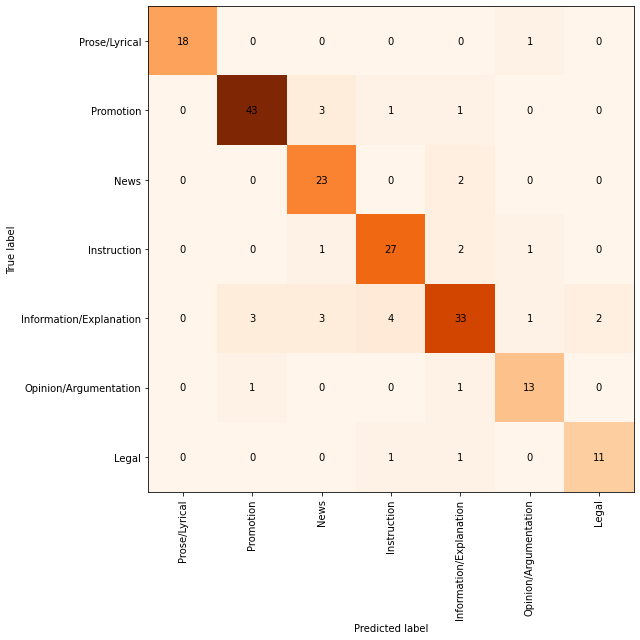

<Figure size 432x288 with 0 Axes>

In [34]:
y_true = list(ftd_pred["labels_to-X-GENRE"])
y_pred = list(ftd_pred["y_pred_to-X-GENRE"])

macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()

# CORE

In [35]:
import json
# Import data
core_pred = pd.read_json("results/CORE-main-Experiments-Results.json")

core_pred

,experiment,num_train_epochs,train_batch_size,learning_rate,microF1,macroF1,y_true,y_pred
0,testing-CORE-main-on-dev,4,8,0.00001,0.736180,0.623031,"{'6282': 'Narrative', '7725': 'Narrative', '18...","{'6282': 'Narrative', '7725': 'Narrative', '18..."
1,testing-CORE-main-on-test,4,8,0.00001,0.744662,0.620480,{'32898': 'Informational Description/Explanati...,{'32898': 'Informational Description/Explanati...
2,testing-CORE-sub-on-dev,6,8,0.00001,0.661529,0.395807,"{'30471': 'News Report/Blog', '29668': 'Sports...","{'30471': 'News Report/Blog', '29668': 'Sports..."
3,testing-CORE-sub-on-test,6,8,0.00001,0.661214,0.394314,"{'18157': 'Personal Blog', '38004': 'Opinion B...","{'18157': 'Opinion Blog', '38004': 'Sports Rep..."


In [36]:
core_pred = core_pred[core_pred["experiment"] == "testing-CORE-sub-on-test"]
core_pred

,experiment,num_train_epochs,train_batch_size,learning_rate,microF1,macroF1,y_true,y_pred
3,testing-CORE-sub-on-test,6,8,0.00001,0.661214,0.394314,"{'18157': 'Personal Blog', '38004': 'Opinion B...","{'18157': 'Opinion Blog', '38004': 'Sports Rep..."


In [47]:
list(core_pred["y_pred"].to_list()[0].values()=ore_pred["y_pred"].to_list()[0].values()

dict_values(['Opinion Blog', 'Sports Report', 'News Report/Blog', 'Sports Report', 'Description of a Thing', 'Description of a Thing', 'News Report/Blog', 'Opinion Blog', 'Reviews', 'Information Blog', 'Personal Blog', 'Sports Report', 'Research Article', 'Sports Report', 'News Report/Blog', 'Discussion Forum', 'Reviews', 'Information Blog', 'News Report/Blog', 'How-to', 'News Report/Blog', 'News Report/Blog', 'Research Article', 'News Report/Blog', 'How-to', 'Reviews', 'Information Blog', 'Description of a Thing', 'Reviews', 'News Report/Blog', 'Opinion Blog', 'Interview', 'Interview', 'Description of a Thing', 'Personal Blog', 'News Report/Blog', 'Opinion Blog', 'News Report/Blog', 'Information Blog', 'Legal terms', 'News Report/Blog', 'Reviews', 'News Report/Blog', 'Opinion Blog', 'Description of a Thing', 'Description of a Thing', 'Personal Blog', 'Description with Intent to Sell', 'Information Blog', 'Research Article', 'Description of a Thing', 'Historical Article', 'How-to', 'Op

In [50]:
core_pred_df = pd.DataFrame({"y_true": list(core_pred["y_true"].to_list()[0].values()), "y_pred": list(core_pred["y_pred"].to_list()[0].values())})

core_pred_df

,y_true,y_pred
0,Personal Blog,Opinion Blog
1,Opinion Blog,Sports Report
2,News Report/Blog,News Report/Blog
3,Sports Report,Sports Report
4,Information Blog,Description of a Thing
...,...,...
3174,Advice,Information Blog
3175,News Report/Blog,Description of a Person
3176,Research Article,Research Article
3177,Opinion Blog,Opinion Blog


In [52]:
# Map the labels
core_pred_df["labels_to-X-GENRE"] = core_pred_df["y_true"].map(map_CORE).fillna("check")

core_pred_df["labels_to-X-GENRE"].value_counts()

News                       1066
discarded                   890
Opinion/Argumentation       718
Forum                       156
Instruction                 123
Information/Explanation     108
Prose/Lyrical                66
Other                        37
Legal                        15
Name: labels_to-X-GENRE, dtype: int64

In [53]:
# Discard texts with "discarded" labels
core_pred_df = core_pred_df[core_pred_df["labels_to-X-GENRE"] != "discarded"]

core_pred_df.describe()

,y_true,y_pred,labels_to-X-GENRE
count,2289,2289,2289
unique,19,23,8
top,News Report/Blog,News Report/Blog,News
freq,840,794,1066


In [54]:
# Map the predicted labels as well
core_pred_df["y_pred_to-X-GENRE"] = core_pred_df["y_pred"].map(map_CORE).fillna("check")

core_pred_df["y_pred_to-X-GENRE"].value_counts()

C:\Users\TajaK\AppData\Local\Temp\ipykernel_13596\1479538369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_pred_df["y_pred_to-X-GENRE"] = core_pred_df["y_pred"].map(map_CORE).fillna("check")


News                       1023
Opinion/Argumentation       590
discarded                   241
Forum                       137
Instruction                 109
Information/Explanation      83
Prose/Lyrical                60
Other                        34
Legal                        12
Name: y_pred_to-X-GENRE, dtype: int64

In [55]:
# Discard texts with "discarded" labels
core_pred_df = core_pred_df[core_pred_df["y_pred_to-X-GENRE"] != "discarded"]

core_pred_df.describe()

,y_true,y_pred,labels_to-X-GENRE,y_pred_to-X-GENRE
count,2048,2048,2048,2048
unique,19,14,8,8
top,News Report/Blog,News Report/Blog,News,News
freq,783,794,1004,1023


In [56]:
3179-2048

1131

Analysis of prediction results of the CORE-sub classifier on 2048 texts from the test split. 1131 texts were not included, because they belong to the discarded categories.

In [57]:
LABELS = list(core_pred_df["labels_to-X-GENRE"].unique())
LABELS

['Opinion/Argumentation',
 'News',
 'Forum',
 'Instruction',
 'Information/Explanation',
 'Legal',
 'Prose/Lyrical',
 'Other']

Macro f1: 0.86, Micro f1: 0.867


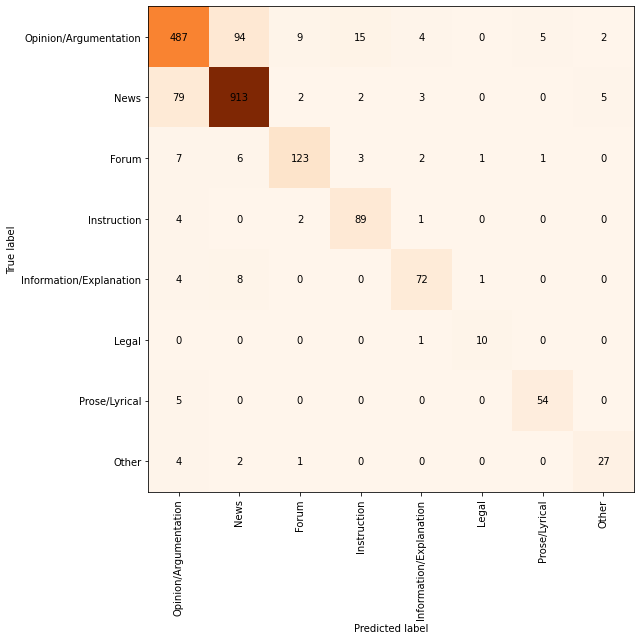

<Figure size 432x288 with 0 Axes>

In [58]:
y_true = list(core_pred_df["labels_to-X-GENRE"])
y_pred = list(core_pred_df["y_pred_to-X-GENRE"])

macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()